# Example of optimizing a convex function

# Goal is to test the objective values found by Mango
- Search space size: Uniform
- Number of iterations to try: 40
- domain size: 5000 
- Initial Random: 5

# Benchmarking test with different iterations for serial executions

In [13]:
from mango.tuner import Tuner
from scipy.stats import uniform

def get_param_dict():
    param_dict = {
        'x': uniform(-5000, 10000)
    }
    return param_dict
    
def objfunc(args_list):
    results = []
    for hyper_par in args_list:
        x = hyper_par['x']
        result = -(x**2)
        results.append(result)
    return results

def get_conf_batch_5():
    conf = dict()
    conf['batch_size'] = 5
    conf['initial_random'] = 5
    conf['num_iteration'] = 100
    conf['domain_size'] = 5000
    return conf


def get_optimal_x():
    param_dict = get_param_dict()
    conf_5 = get_conf_batch_5()
    tuner_5 = Tuner(param_dict, objfunc,conf_5)
    
    results_5 = tuner_5.maximize()
    
    return results_5

In [14]:
Store_Optimal_X = []
Store_Results = []
num_of_tries = 100

In [ ]:
for i in range(num_of_tries):
    results_5 = get_optimal_x()
    Store_Results.append([results_5])
    print(i,":",results_5['best_params']['x'])

0 : -0.008148132618771342
1 : -0.0008830314636725234
2 : -0.009024221817526268
3 : 0.020773790987732355
4 : -0.0008817280131552252
5 : -0.010808067771904462
6 : 0.0017533034788357327
7 : -0.007538192517131392
8 : 0.016946647980148555
9 : 0.028140351858382928
10 : -0.00740397118988767
11 : -0.0033349137147524743
12 : 0.004013117129034072
13 : -0.00669723340706696
14 : -0.027843120260513388


# Sandeep we need to process the results

# Extract from the results returned the true optimal values for each iteration

In [74]:
import numpy as np

total_experiments = 100

initial_random = 5

plotting_itr =[20,30,40,50,60,70,80,90,100]

plotting_list = []

for exp in range(total_experiments): #for all exp
    local_list = []
    for itr in plotting_itr: # for all points to plot
        # find the value of optimal parameters in itr+ initial_random
        max_value = np.array(Store_Results[exp]['objective_values'][:itr+initial_random]).max()
        local_list.append(max_value)
    plotting_list.append(local_list)

In [75]:
plotting_array = np.array(plotting_list)

In [76]:
plotting_array.shape

(100, 9)

In [103]:
#plotting_array

In [107]:
Y = []
#count range between -1 and 1 and show it
for i in range(len(plotting_itr)):
    y_value = np.count_nonzero((plotting_array[:,i] > -1))/plotting_array[:,i].size
    Y.append(y_value*100)

In [108]:
#np.count_nonzero((plotting_array[:,0] > -1) & (plotting_array[:,0] < 1))/plotting_array[:,0].size

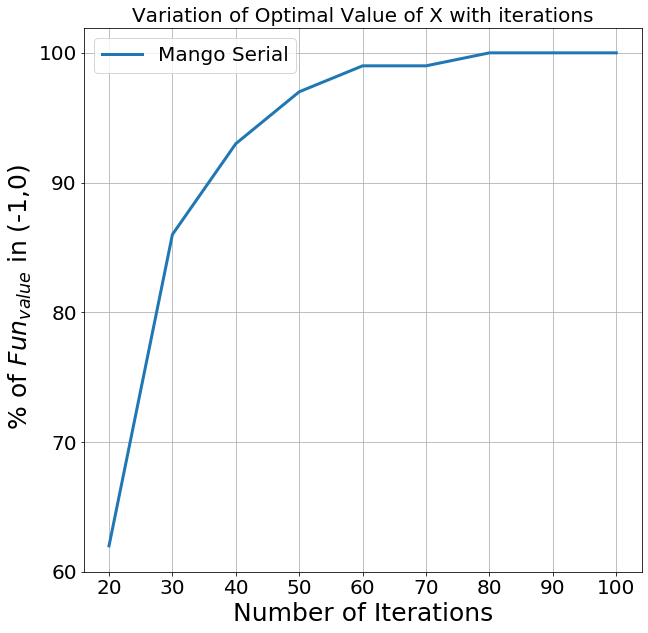

In [117]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))


plt.plot(plotting_itr,Y,label = 'Mango Serial',linewidth=3.0) #x, y


plt.xlabel('Number of Iterations',fontsize=25)
plt.ylabel(' % of $Fun_{value}$ in (-1,0)',fontsize=25)
plt.title('Variation of Optimal Value of X with iterations',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.yticks(np.arange(60, 110, step=10))
plt.grid(True)
plt.legend(fontsize=20)
plt.show()